In [241]:
!pip install torch


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [242]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [243]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [244]:
import torch
import numpy as np
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

In [245]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [246]:
data_size = 1000

In [247]:
# y = sin(x1 * x2)
def generate_data_1():
    x = np.random.uniform(low=-1, high=1, size = (data_size, 2))
    y = np.sin(x[:, 0] * x[:, 1]) + np.random.randn(data_size) * 0.1
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype = torch.float32).view(-1, 1)

In [248]:
generate_data_1()

(tensor([[-0.1876,  0.1326],
         [ 0.2928, -0.4378],
         [ 0.1755, -0.8064],
         ...,
         [ 0.9257, -0.9318],
         [-0.0164,  0.4483],
         [ 0.7330, -0.5384]]),
 tensor([[-0.2414],
         [-0.2069],
         [ 0.0307],
         [ 0.3030],
         [-0.3235],
         [ 0.2086],
         [ 0.8636],
         [-0.2233],
         [-0.1029],
         [-0.1903],
         [ 0.0399],
         [-0.0459],
         [ 0.2721],
         [ 0.5111],
         [-0.1518],
         [ 0.0885],
         [ 0.2643],
         [-0.0249],
         [ 0.1700],
         [ 0.4333],
         [-0.1716],
         [-0.3095],
         [ 0.4286],
         [ 0.1830],
         [-0.1730],
         [ 0.2883],
         [-0.4851],
         [-0.2015],
         [-0.0724],
         [ 0.1703],
         [-0.6040],
         [ 0.0134],
         [ 0.2991],
         [-0.2342],
         [ 0.3876],
         [ 0.0815],
         [-0.4093],
         [ 0.4007],
         [ 0.4044],
         [ 0.3098],
         [

In [249]:
# y = (x1 + x2)^2
def generate_data_2():
    x = np.random.uniform(low=-1, high=1, size = (data_size, 2))
    y = x[:, 0] ** 2 + x[:, 1] ** 2 + 2 * x[:, 0] * x[:, 1] + np.random.randn(data_size) * 0.1
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [250]:
generate_data_2()

(tensor([[-0.9306,  0.0028],
         [-0.4787,  0.8425],
         [ 0.7429, -0.4188],
         ...,
         [ 0.4524, -0.2418],
         [-0.9333, -0.4347],
         [-0.9525, -0.4666]]),
 tensor([[ 9.9613e-01],
         [ 1.4484e-01],
         [ 6.9095e-02],
         [ 2.5921e-01],
         [ 2.1580e-01],
         [ 7.7389e-02],
         [ 1.9809e+00],
         [ 1.6959e-01],
         [ 1.5963e+00],
         [ 7.1757e-02],
         [ 1.4406e+00],
         [ 1.6444e+00],
         [ 2.7801e-01],
         [ 6.3965e-01],
         [ 4.7343e-02],
         [ 2.9767e-01],
         [ 9.0176e-01],
         [ 5.4739e-02],
         [-2.0545e-03],
         [ 2.3411e-02],
         [ 2.4939e+00],
         [ 4.5668e-01],
         [ 1.5773e+00],
         [ 1.4674e-01],
         [ 5.0305e-01],
         [-1.4853e-02],
         [ 2.2935e-01],
         [-1.4395e-02],
         [ 3.6259e-01],
         [ 8.1428e-02],
         [-1.4316e-01],
         [ 5.3428e-01],
         [ 1.5312e+00],
         [ 1.8872e

In [251]:
# y = log(x1 + x2)
def generate_data_3():
    x = np.random.uniform(low=1, high=2, size = (data_size, 2))
    y = np.log(x[:, 0] + x[:, 1]) + np.random.randn(data_size) * 0.1
    return torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32).view(-1, 1)

In [252]:
generate_data_3()

(tensor([[1.0055, 1.7622],
         [1.4065, 1.6015],
         [1.5495, 1.9095],
         ...,
         [1.2202, 1.2659],
         [1.0162, 1.8814],
         [1.2025, 1.0271]]),
 tensor([[1.0276],
         [1.3279],
         [1.1254],
         [1.3476],
         [0.7076],
         [1.2066],
         [1.0674],
         [0.5102],
         [1.1566],
         [1.1416],
         [0.8786],
         [0.9890],
         [0.9342],
         [1.1301],
         [0.9925],
         [0.9619],
         [1.1319],
         [1.0217],
         [0.8875],
         [0.9001],
         [1.2985],
         [1.2559],
         [0.8994],
         [1.1060],
         [1.0755],
         [0.8211],
         [1.3332],
         [1.1286],
         [0.9943],
         [1.1937],
         [1.4116],
         [1.2010],
         [0.9940],
         [0.9943],
         [0.8275],
         [0.8746],
         [1.1520],
         [1.1320],
         [1.2940],
         [1.0815],
         [1.3174],
         [1.1566],
         [1.0417],
     

In [253]:
input_size = 2
hidden_size = 64
output_size = 1
num_epochs = 50
lr = 0.001
dropout = 0.2
criterion = torch.nn.MSELoss()

In [254]:
class MyModel(torch.nn.Module):
    def __init__(self, batchnorm_in_use = True, dropout_in_use = True ):
        super(MyModel, self).__init__()
        self.l1 = torch.nn.Linear(input_size, hidden_size)
        self.batchnorm1 = torch.nn.BatchNorm1d(hidden_size) if batchnorm_in_use else torch.nn.Identity()
        self.l2 = torch.nn.Linear(hidden_size, hidden_size)
        self.batchnorm2 = torch.nn.BatchNorm1d(hidden_size) if batchnorm_in_use else torch.nn.Identity()
        self.l3 = torch.nn.Linear(hidden_size, output_size)
        self.dropout = torch.nn.Dropout(dropout) if dropout_in_use else torch.nn.Identity()
    def forward(self, x):
        x = torch.relu(self.batchnorm1(self.l1(x)))
        x = self.dropout(torch.relu(self.batchnorm2(self.l2(x))))
        x = self.l3(x)
        return x

In [255]:
def train(model, dataloader, optimizer):
    model.train()
    epoch_losses = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, targets in dataloader:
            inputs, targets = inputs.to(device), targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        epoch_losses.append(running_loss/len(dataloader))
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataloader)}")
    return epoch_losses
    

In [256]:
# Part 1 - dataset 1
x_tensor, y_tensor = generate_data_1()
dataset = TensorDataset(x_tensor, y_tensor)
batch_size_losses = {}

batch_sizes = [16, 32, 64, 128]
for batch_size in batch_sizes:
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = MyModel(batchnorm_in_use=True, dropout_in_use=False).to(device)
    optimizer = optim.Adam(model.parameters(), lr)
    print(f"\nBatch size: {batch_size}\n")
    epoch_losses = train(model, dataloader, optimizer)
    batch_size_losses[batch_size] = epoch_losses
    
best_batch_size_1 = min(batch_size_losses, key = lambda x: batch_size_losses[x][-1])
print (f"Best batch size = {best_batch_size_1}")


Batch size: 16

Epoch 1/50, Loss: 0.054666646209264556
Epoch 2/50, Loss: 0.03247041856899621
Epoch 3/50, Loss: 0.03110107235492222
Epoch 4/50, Loss: 0.026345103247357265
Epoch 5/50, Loss: 0.03221817833504507
Epoch 6/50, Loss: 0.02726285317025724
Epoch 7/50, Loss: 0.029530489809870247
Epoch 8/50, Loss: 0.03162223165706983
Epoch 9/50, Loss: 0.026921329162423572
Epoch 10/50, Loss: 0.029213870505964946
Epoch 11/50, Loss: 0.02727079518612415
Epoch 12/50, Loss: 0.02573261640611149
Epoch 13/50, Loss: 0.0293045783090213
Epoch 14/50, Loss: 0.031614474139161526
Epoch 15/50, Loss: 0.03134010350036006
Epoch 16/50, Loss: 0.02779511105091799
Epoch 17/50, Loss: 0.02529697823855612
Epoch 18/50, Loss: 0.02915719813770718
Epoch 19/50, Loss: 0.028485593711218192
Epoch 20/50, Loss: 0.02819219729789193
Epoch 21/50, Loss: 0.026361681609636263
Epoch 22/50, Loss: 0.02674592138519363
Epoch 23/50, Loss: 0.024632292792260174
Epoch 24/50, Loss: 0.02311143840825747
Epoch 25/50, Loss: 0.023896317936420913
Epoch 26

In [257]:
# Part 1 - dataset 2
x_tensor, y_tensor = generate_data_2()
dataset = TensorDataset(x_tensor, y_tensor)
batch_size_losses = {}

batch_sizes = [16, 32, 64, 128]
for batch_size in batch_sizes:
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = MyModel(batchnorm_in_use=True, dropout_in_use=False).to(device)
    optimizer = optim.Adam(model.parameters(), lr)
    print(f"\nBatch size: {batch_size}\n")
    epoch_losses = train(model, dataloader, optimizer)
    batch_size_losses[batch_size] = epoch_losses
    
best_batch_size_2 = min(batch_size_losses, key = lambda x: batch_size_losses[x][-1])
print (f"Best batch size = {best_batch_size_2}")


Batch size: 16

Epoch 1/50, Loss: 0.27985350509721135
Epoch 2/50, Loss: 0.15955051223910044
Epoch 3/50, Loss: 0.14915761520110427
Epoch 4/50, Loss: 0.18431187533433474
Epoch 5/50, Loss: 0.1876568454539492
Epoch 6/50, Loss: 0.19953037945494528
Epoch 7/50, Loss: 0.1535980056025206
Epoch 8/50, Loss: 0.15238768184587123
Epoch 9/50, Loss: 0.16519586833578254
Epoch 10/50, Loss: 0.14852505496570043
Epoch 11/50, Loss: 0.149035532027483
Epoch 12/50, Loss: 0.12875520378824265
Epoch 13/50, Loss: 0.1572101249226502
Epoch 14/50, Loss: 0.13277747263274495
Epoch 15/50, Loss: 0.16384373333245988
Epoch 16/50, Loss: 0.1418740384369379
Epoch 17/50, Loss: 0.1938488200484287
Epoch 18/50, Loss: 0.12568022006206095
Epoch 19/50, Loss: 0.13404116466168373
Epoch 20/50, Loss: 0.1258827926265815
Epoch 21/50, Loss: 0.14541693342228731
Epoch 22/50, Loss: 0.13003435526930152
Epoch 23/50, Loss: 0.13438080331044538
Epoch 24/50, Loss: 0.14394329792805136
Epoch 25/50, Loss: 0.10360199414075368
Epoch 26/50, Loss: 0.1320

In [258]:
# Part 1 - dataset 3
x_tensor, y_tensor = generate_data_2()
dataset = TensorDataset(x_tensor, y_tensor)
batch_size_losses = {}

batch_sizes = [16, 32, 64, 128]
for batch_size in batch_sizes:
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    model = MyModel(batchnorm_in_use=True, dropout_in_use=False).to(device)
    optimizer = optim.Adam(model.parameters(), lr)
    print(f"\nBatch size: {batch_size}\n")
    epoch_losses = train(model, dataloader, optimizer)
    batch_size_losses[batch_size] = epoch_losses
    
best_batch_size_3 = min(batch_size_losses, key = lambda x: batch_size_losses[x][-1])
print (f"Best batch size = {best_batch_size_3}")


Batch size: 16

Epoch 1/50, Loss: 0.2510173327570397
Epoch 2/50, Loss: 0.14534943182730958
Epoch 3/50, Loss: 0.14563132033106826
Epoch 4/50, Loss: 0.15745578345561784
Epoch 5/50, Loss: 0.12043768389239198
Epoch 6/50, Loss: 0.12792223564807384
Epoch 7/50, Loss: 0.1282670290490228
Epoch 8/50, Loss: 0.12743669955266845
Epoch 9/50, Loss: 0.13019249127024696
Epoch 10/50, Loss: 0.13875056321303997
Epoch 11/50, Loss: 0.1316272331076482
Epoch 12/50, Loss: 0.12030382753009834
Epoch 13/50, Loss: 0.12745609051651424
Epoch 14/50, Loss: 0.11977108930134112
Epoch 15/50, Loss: 0.11912804988345929
Epoch 16/50, Loss: 0.12692165126403174
Epoch 17/50, Loss: 0.10717825680261567
Epoch 18/50, Loss: 0.1501355434339198
Epoch 19/50, Loss: 0.12716594090064368
Epoch 20/50, Loss: 0.13068981317891962
Epoch 21/50, Loss: 0.13366111045673726
Epoch 22/50, Loss: 0.12129290517242182
Epoch 23/50, Loss: 0.14711362972027725
Epoch 24/50, Loss: 0.11813616607752112
Epoch 25/50, Loss: 0.10959167098478666
Epoch 26/50, Loss: 0.

In [259]:
the_best_batch_size = [best_batch_size_1, best_batch_size_2, best_batch_size_3]
the_best_batch_size = max(set(the_best_batch_size), key=the_best_batch_size.count)
the_best_batch_size

128

In [260]:
# Part 2

model_configs = [
    {"name": "Without dropout and batchnorm", "dropout_in_use": False, "batchnorm_in_use": False},
    {"name": "Only batchnorm", "dropout_in_use": False, "batchnorm_in_use": True},
    {"name": "Only dropout", "dropout_in_use": True, "batchnorm_in_use": False},
    {"name": "Dropout and batchnorm", "dropout_in_use": True, "batchnorm_in_use": True}
]

datasets = [
    ("Dataset 1 - sin", generate_data_1),
    ("Dataset 2 - ()^2", generate_data_2),
    ("Dataset 3 - log", generate_data_3),
]

config_losses = {}

In [261]:
for dataset_name, dataset in datasets:
    print(f"\nDataset: {dataset_name}\n")
    
    x_tensor, y_tensor = dataset()
    dataset = TensorDataset(x_tensor, y_tensor)
    
    for config in model_configs:
        print(f"\nConfig: {config}")
        dataloader = DataLoader(dataset, batch_size=the_best_batch_size, shuffle=True)
        model = MyModel(batchnorm_in_use=config["batchnorm_in_use"], dropout_in_use=config["dropout_in_use"]).to(device)
        optimizer = optim.Adam(model.parameters(), lr)
        epoch_losses = train(model, dataloader, optimizer)
        
        config_losses[f"{dataset_name} - {config['name']}"] = epoch_losses


Dataset: Dataset 1 - sin


Config: {'name': 'Without dropout and batchnorm', 'dropout_in_use': False, 'batchnorm_in_use': False}
Epoch 1/50, Loss: 0.08745983149856329
Epoch 2/50, Loss: 0.061883578076958656
Epoch 3/50, Loss: 0.04507588129490614
Epoch 4/50, Loss: 0.03078170702792704
Epoch 5/50, Loss: 0.020953782368451357
Epoch 6/50, Loss: 0.01579428371042013
Epoch 7/50, Loss: 0.013597249402664602
Epoch 8/50, Loss: 0.01254786376375705
Epoch 9/50, Loss: 0.011754762148484588
Epoch 10/50, Loss: 0.011168090160936117
Epoch 11/50, Loss: 0.01103610685095191
Epoch 12/50, Loss: 0.011055332492105663
Epoch 13/50, Loss: 0.010916352272033691
Epoch 14/50, Loss: 0.01094809581991285
Epoch 15/50, Loss: 0.010873483261093497
Epoch 16/50, Loss: 0.010902564506977797
Epoch 17/50, Loss: 0.010672842268832028
Epoch 18/50, Loss: 0.010585412150248885
Epoch 19/50, Loss: 0.010551952407695353
Epoch 20/50, Loss: 0.01063071156386286
Epoch 21/50, Loss: 0.01067790703382343
Epoch 22/50, Loss: 0.010431559407152236
Epoch 23

In [262]:
config_losses.items()

dict_items([('Dataset 1 - sin - Without dropout and batchnorm', [0.08745983149856329, 0.061883578076958656, 0.04507588129490614, 0.03078170702792704, 0.020953782368451357, 0.01579428371042013, 0.013597249402664602, 0.01254786376375705, 0.011754762148484588, 0.011168090160936117, 0.01103610685095191, 0.011055332492105663, 0.010916352272033691, 0.01094809581991285, 0.010873483261093497, 0.010902564506977797, 0.010672842268832028, 0.010585412150248885, 0.010551952407695353, 0.01063071156386286, 0.01067790703382343, 0.010431559407152236, 0.010727530578151345, 0.010443817009218037, 0.010569014586508274, 0.010501594981178641, 0.010421336395666003, 0.010401563427876681, 0.01044620806351304, 0.010452387039549649, 0.010643941350281239, 0.01045071508269757, 0.01038852019701153, 0.010583087103441358, 0.010382172535173595, 0.010303573333658278, 0.010357685736380517, 0.010237228008918464, 0.010200757533311844, 0.010368582443334162, 0.010253904736600816, 0.010247880010865629, 0.010603322298265994, 0

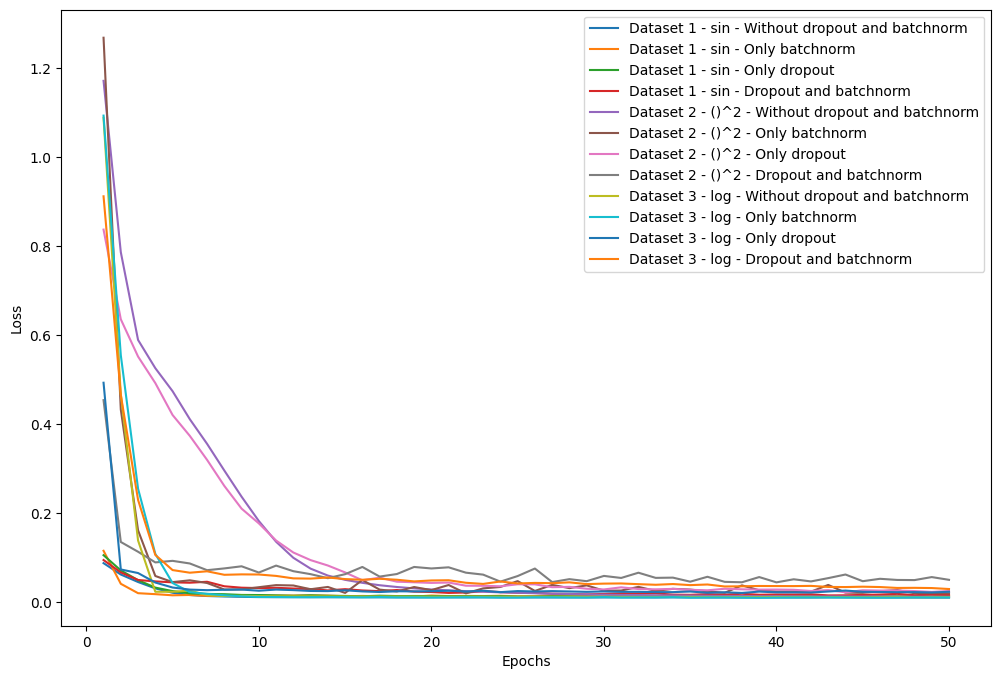

In [263]:
plt.figure(figsize=(12,8))
for config_name, losses in config_losses.items():
    plt.plot(range(1, num_epochs + 1), losses, label=config_name)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


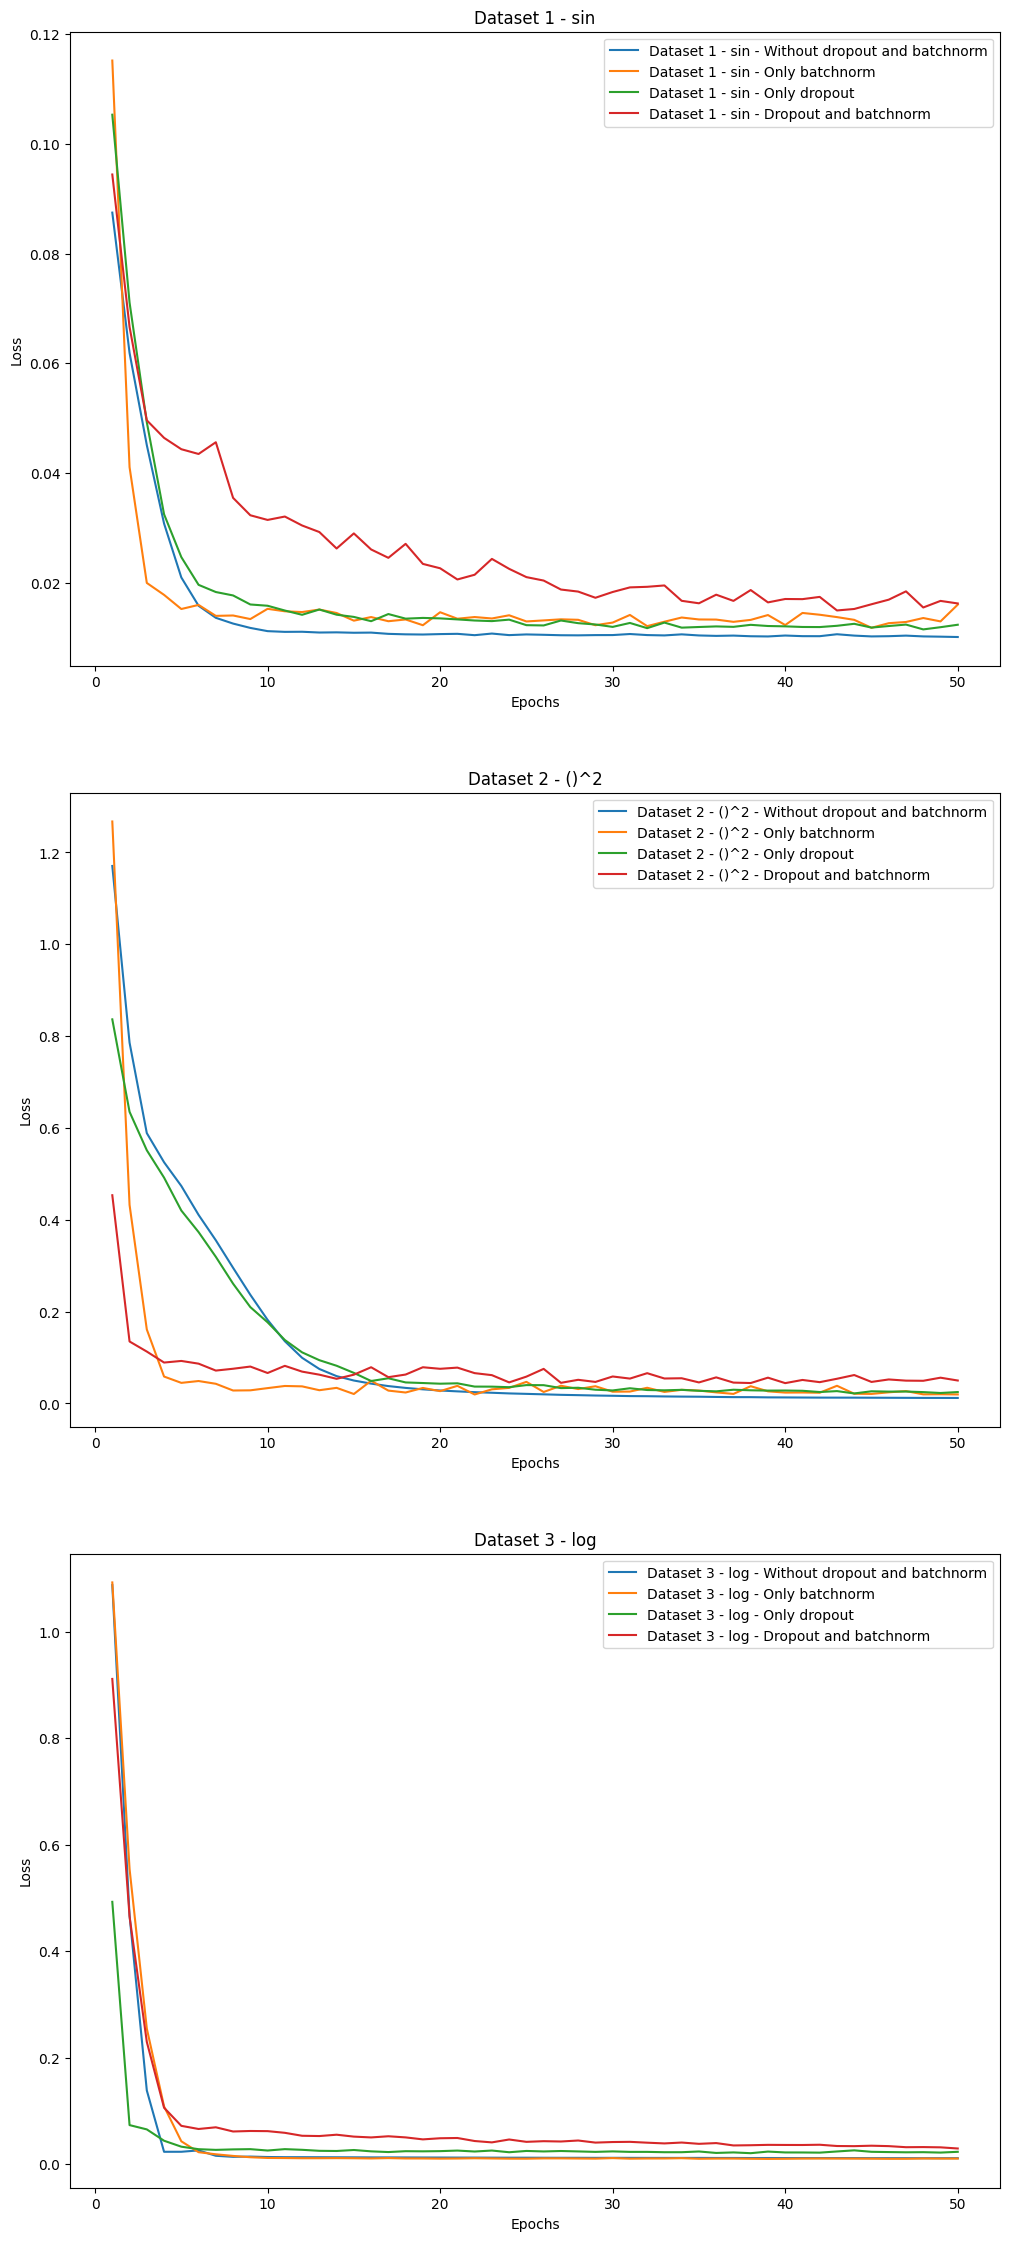

In [266]:
fig, axs = plt.subplots(3, 1, figsize=(12, 28))  
axs[0].set_title("Dataset 1 - sin")
axs[1].set_title("Dataset 2 - ()^2")
axs[2].set_title("Dataset 3 - log")

for dataset_name, dataset in datasets:
    for config in model_configs:
        config_name = f"{dataset_name} - {config['name']}"
        if config_name in config_losses:
            if dataset_name == "Dataset 1 - sin":
                axs[0].plot(range(1, num_epochs + 1), config_losses[config_name], label=config_name)
            elif dataset_name == "Dataset 2 - ()^2":
                axs[1].plot(range(1, num_epochs + 1), config_losses[config_name], label=config_name)
            else:
                axs[2].plot(range(1, num_epochs + 1), config_losses[config_name], label=config_name)

for ax in axs:
    ax.set_xlabel("Epochs")
    ax.set_ylabel("Loss")
    ax.legend()

plt.show()


Выводы:
1) Увеличение размера батча приводит к большей эффективности, но время вычисления увеличивается
2) Наличие батчевой нормализации и дропаута одновременно сильно ускоряет обучение 
3) Наличие только батчевой нормализации или только дропаута и близко не дает таких хороших результатов, как их совместная работа